In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('../data/drivers_clean.csv')
df2 = pd.read_csv('../data/fastest_laps_clean.csv')

df1.head()

,driver_id,pos,driver,nationality,car,pts,year,code
0,1,1,Nino Farina,ITA,Alfa Romeo,30.0,1950,FAR
1,2,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950,FAN
2,3,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950,FAG
3,4,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950,ROS
4,5,5,Alberto Ascari,ITA,Ferrari,11.0,1950,ASC


In [ ]:
'''CUANTOS PILOTOS EUROPEOS DE CADA PAIS HAN SUPERADO LOS 50 PUNTOS ENTRE
1960 Y 1970, 1990 Y 2000'''

In [3]:
def buscar_temporada_df1(año):
    
    return df1[df1.year == año]

In [4]:
def buscar_nombre_df1(columna, nombre):

    return df1[df1[columna].str.contains(nombre, case=False, na=False)]

In [5]:
df1_numerical = ['pos', 'pts', 'year']

df1[df1_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
pos,1661.0,11.416616,6.442690,0.0,6.0,11.0,17.0,28.0
pts,1661.0,31.138170,60.446033,0.0,3.0,9.0,32.0,575.0
year,1661.0,1987.124624,21.849750,1950.0,1968.0,1987.0,2006.0,2024.0


In [6]:
df = pd.DataFrame
df(df1[df1.nationality == 'ESP'].driver.unique(), columns=['driver'])

,driver
0,Paco Godia
1,Alfonso de Portago
2,Luis Perez-Sala
3,Pedro de la Rosa
4,Marc Gene
5,Fernando Alonso
6,Jaime Alguersuari
7,Carlos Sainz
8,Roberto Merhi


In [7]:
df(df1.groupby('driver')['pts'].agg('sum')).sort_values(by='pts', ascending=False).head(10)

,pts
driver,
Lewis Hamilton,4681.5
Sebastian Vettel,3098.0
Max Verstappen,2755.5
Fernando Alonso,2300.0
Kimi Raikkonen,1873.0
Nico Rosberg,1594.5
Sergio Perez,1593.0
Michael Schumacher,1566.0
Daniel Ricciardo,1322.0


In [8]:
df(df1.groupby('driver')['pts'].agg('sum')).sort_values(by='pts',ascending=False).head(25)

,pts
driver,
Lewis Hamilton,4681.5
Sebastian Vettel,3098.0
Max Verstappen,2755.5
Fernando Alonso,2300.0
Kimi Raikkonen,1873.0
Nico Rosberg,1594.5
Sergio Perez,1593.0
Michael Schumacher,1566.0
Daniel Ricciardo,1322.0


In [9]:
pts_year_avg = df1.groupby('year')['pts'].agg('mean')

In [10]:
df1[df1.year == 2024].pts.mean()

42.23809523809524

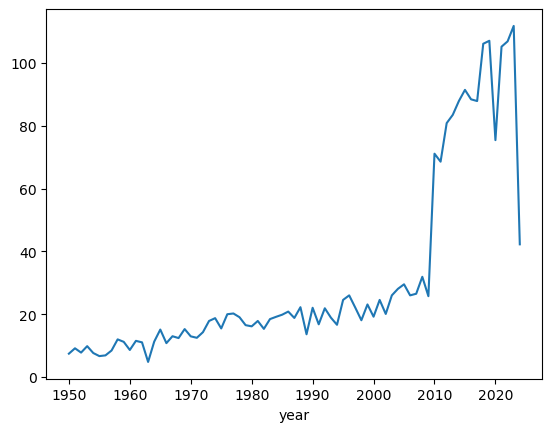

In [11]:
df1.groupby('year')['pts'].agg('mean').plot()
plt.show()

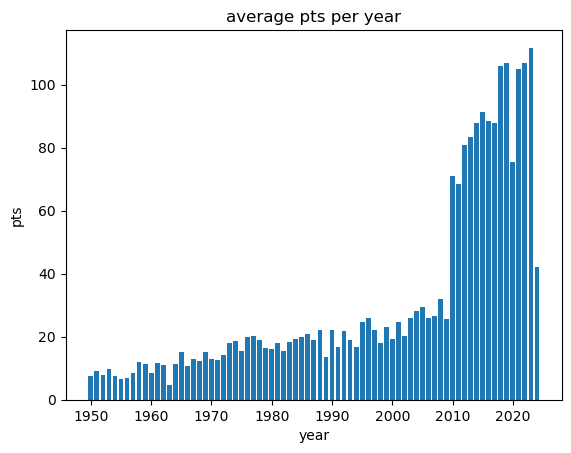

In [12]:
plt.bar(pts_year_avg.index, pts_year_avg.values)
plt.title("average pts per year")
plt.xlabel("year")
plt.ylabel("pts")
plt.show()

In [13]:
df1_old = df1[df1.year <= 2009]

df(df1_old.groupby('year')['pts'].agg('mean'))

,pts
year,
1950,7.454545
1951,9.157895
1952,7.795455
1953,9.842105
1954,7.657692
1955,6.676000
1956,6.907407
1957,8.454545
1958,12.000000


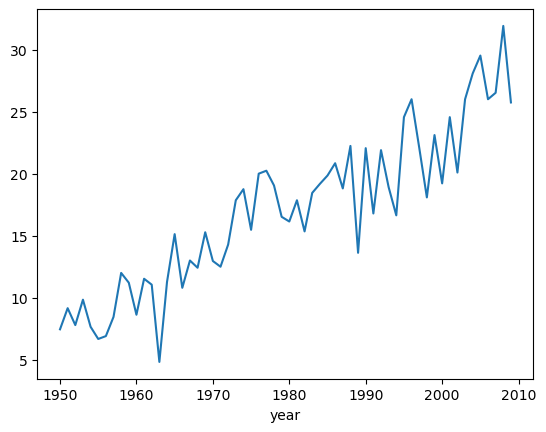

In [14]:
df1_old.groupby('year')['pts'].agg('mean').plot();

In [15]:
df1_new = df1[(df1.year >= 2010) & (df1.year != 2024)]

df(df1_new.groupby('year')['pts'].agg('mean'))

,pts
year,
2010,71.074074
2011,68.535714
2012,80.800000
2013,83.434783
2014,87.826087
2015,91.380952
2016,88.375000
2017,87.826087
2018,106.050000


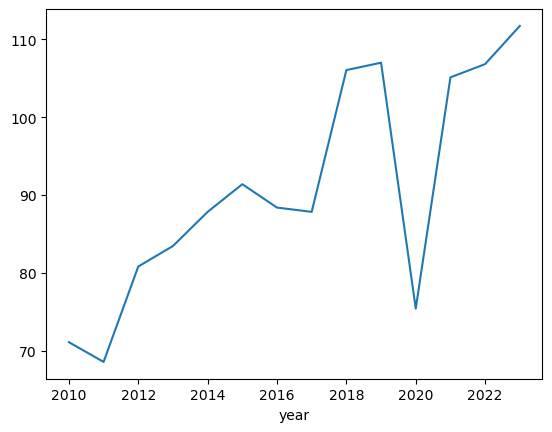

In [16]:
df1_new.groupby('year')['pts'].agg('mean').plot();

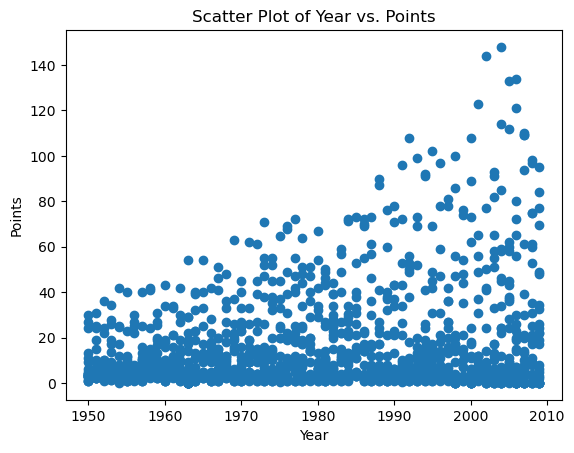

In [17]:
plt.scatter(df1_old['year'], df1_old['pts'])
plt.title('Scatter Plot of Year vs. Points')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

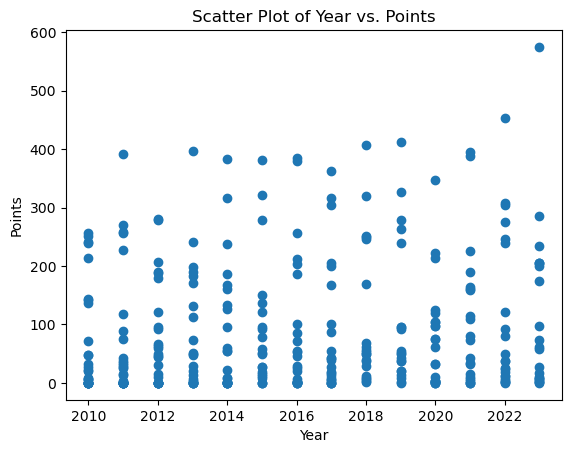

In [18]:
plt.scatter(df1_new['year'], df1_new['pts'])
plt.title('Scatter Plot of Year vs. Points')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

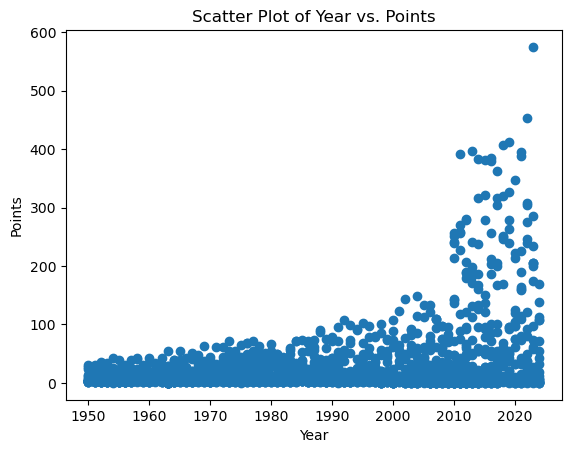

In [19]:
plt.scatter(df1['year'], df1['pts'])
plt.title('Scatter Plot of Year vs. Points')
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

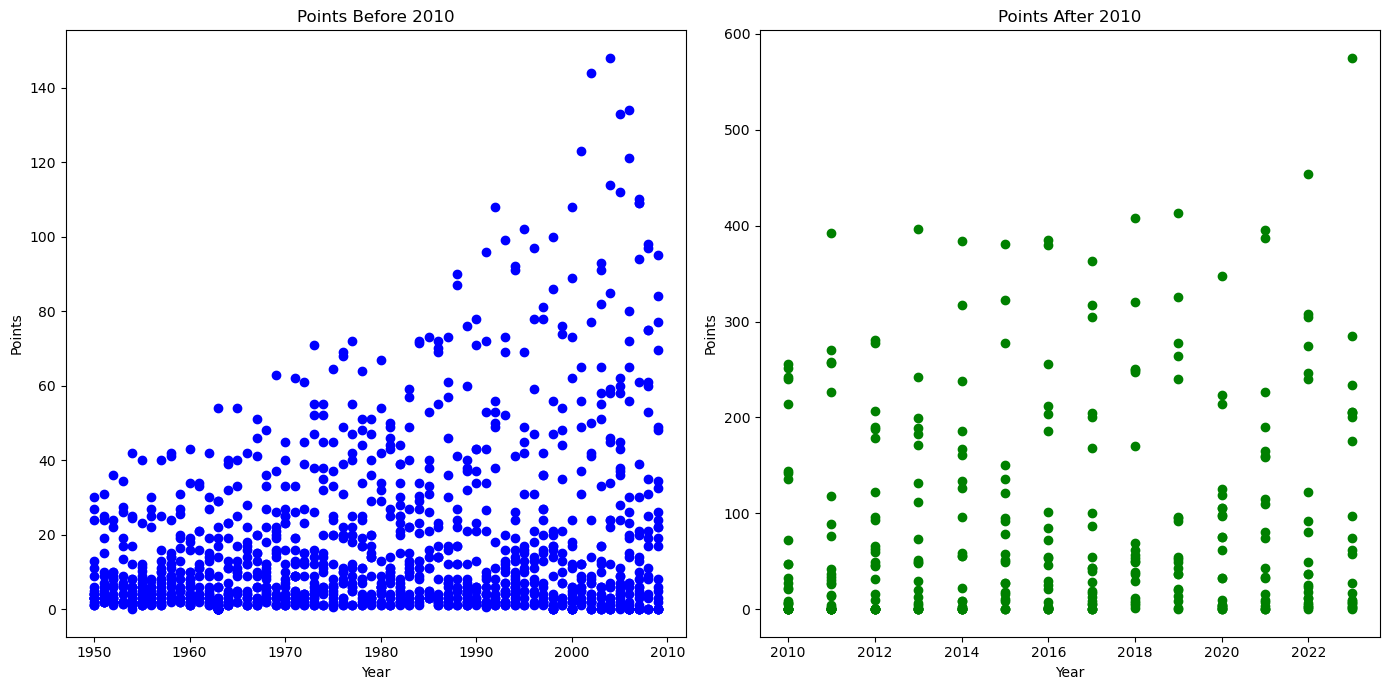

In [20]:
plt.figure(figsize=(14, 7))

# Gráfico para los años anteriores a 2010
plt.subplot(1, 2, 1)
plt.scatter(df1_old['year'], df1_old['pts'], color='blue')
plt.title('Points Before 2010')
plt.xlabel('Year')
plt.ylabel('Points')

# Gráfico para los años desde 2010
plt.subplot(1, 2, 2)
plt.scatter(df1_new['year'], df1_new['pts'], color='green')
plt.title('Points After 2010')
plt.xlabel('Year')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

In [21]:
top_25_pilotos_ptos = df1.groupby('driver')['pts'].agg('sum').sort_values(ascending=False).head(25)

top_25_pilotos_ptos

driver
Lewis  Hamilton         4681.5
Sebastian  Vettel       3098.0
Max  Verstappen         2755.5
Fernando  Alonso        2300.0
Kimi Raikkonen          1873.0
Nico  Rosberg           1594.5
Sergio  Perez           1593.0
Michael  Schumacher     1566.0
Daniel  Ricciardo       1322.0
Jenson  Button          1235.0
Charles  Leclerc        1212.0
Felipe  Massa           1167.0
Carlos  Sainz           1090.5
Valtteri  Bottas        1081.0
Mark  Webber            1047.5
Alain  Prost             768.5
Lando  Norris            746.0
Valtteri Bottas          716.0
Rubens  Barrichello      658.0
Ayrton  Senna            610.0
Nico  Hulkenberg         536.0
David  Coulthard         535.0
George  Russell          523.0
Nelson  Piquet           500.5
Nigel  Mansell           480.0
Name: pts, dtype: float64

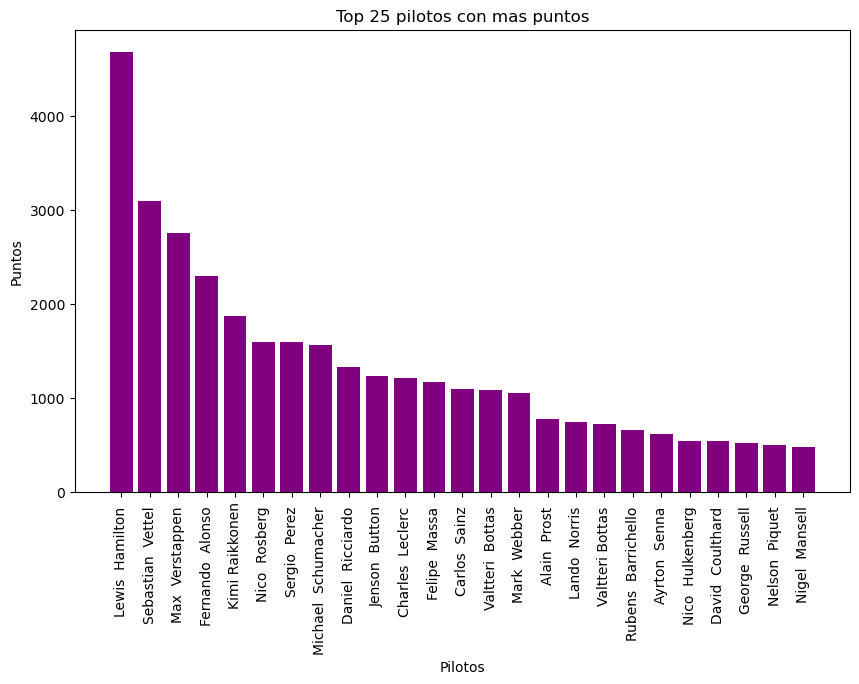

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(top_25_pilotos_ptos.index, top_25_pilotos_ptos.values, color='purple')
plt.title("Top 25 pilotos con mas puntos")
plt.xlabel("Pilotos")
plt.ylabel("Puntos")
plt.xticks(rotation=90)
plt.show()

In [23]:
df1.nationality.value_counts()

nationality
GBR    299
ITA    193
FRA    185
GER    137
USA    135
BRA    111
FIN     65
ESP     51
AUS     51
AUT     44
NZL     38
BEL     36
ARG     35
JPN     35
SWE     33
SUI     31
MEX     30
CAN     27
NED     27
RSA     16
DEN     11
RUS     10
MON      9
POL      7
THA      7
VEN      6
COL      6
IND      5
POR      4
IRL      4
RHO      3
CHN      3
HUN      2
CHI      2
MAS      1
INA      1
RAF      1
Name: count, dtype: int64

In [24]:
tab = df1[['driver', 'nationality']]

nacionalidad = df(tab.value_counts()).reset_index()

nacionality_count = nacionalidad.nationality.value_counts()

nacionality_count

nationality
GBR    71
USA    56
ITA    51
FRA    40
BRA    24
GER    22
JPN    11
BEL     9
ESP     9
ARG     9
NED     8
FIN     8
RSA     8
AUT     7
SUI     7
SWE     7
NZL     6
MEX     6
AUS     6
CAN     5
RUS     3
POR     3
DEN     3
MON     3
VEN     2
THA     2
IND     2
IRL     2
RHO     2
COL     1
CHN     1
POL     1
HUN     1
CHI     1
MAS     1
INA     1
RAF     1
Name: count, dtype: int64

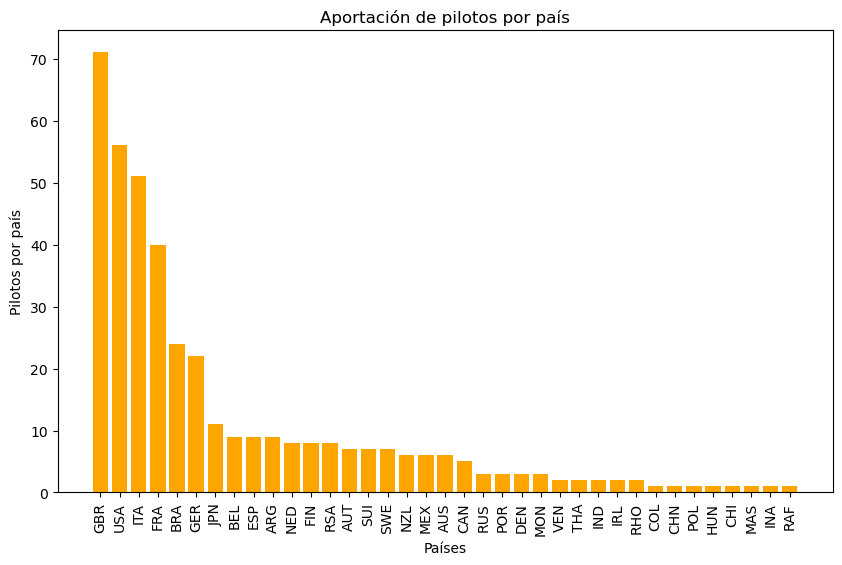

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(nacionality_count.index, nacionality_count.values, color='orange')
plt.title("Aportación de pilotos por país")
plt.xlabel("Países")
plt.ylabel("Pilotos por país")
plt.xticks(rotation=90)
plt.show()

In [26]:
usa = df1[df1.nationality == 'USA']

usa_count = usa[['driver', 'year']].reset_index(drop=True)

usa_drivers_per_year = usa_count.groupby('year').agg('count')

df_usa_drivers_per_year = usa_drivers_per_year.reset_index()

df_usa_drivers_per_year

,year,driver
0,1950,6
1,1951,6
2,1952,6
3,1953,7
4,1954,6
5,1955,8
6,1956,7
7,1957,7
8,1958,7
9,1959,9


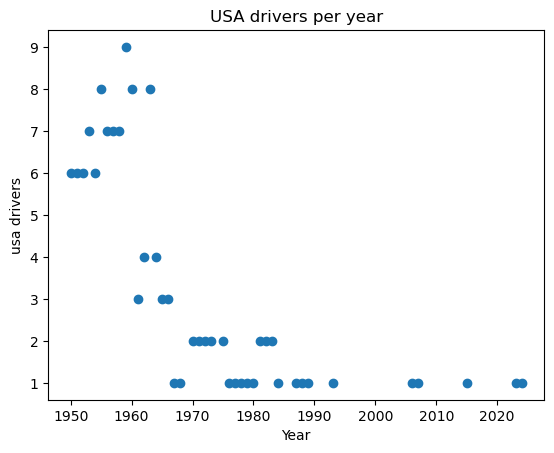

In [27]:
plt.scatter(df_usa_drivers_per_year['year'], df_usa_drivers_per_year['driver'])
plt.title('USA drivers per year')
plt.xlabel('Year')
plt.ylabel('usa drivers')
plt.show()

In [28]:
df2

,grandprix,driver,car,time,year,code
0,Great Britain,Nino Farina,Alfa Romeo,1:50.600,1950,FAR
1,Monaco,Juan Manuel Fangio,Alfa Romeo,1:51.000,1950,FAN
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,01:09.77,1950,PAR
3,Switzerland,Nino Farina,Alfa Romeo,2:41.600,1950,FAR
4,Belgium,Nino Farina,Alfa Romeo,4:34.100,1950,FAR
...,...,...,...,...,...,...
1103,Japan,Max Verstappen,Red Bull Racing Honda RBPT,1:33.706,2024,VER
1104,China,Fernando Alonso,Aston Martin Aramco Mercedes,1:37.810,2024,ALO
1105,Miami,Oscar Piastri,McLaren Mercedes,1:30.634,2024,PIA
1106,Emilia Romagna,George Russell,Mercedes,1:18.589,2024,RUS


In [29]:
df2.driver.value_counts().reset_index().head(10)

,driver,count
0,Michael Schumacher,76
1,Lewis Hamilton,66
2,Kimi Raikkonen,46
3,Alain Prost,41
4,Sebastian Vettel,38
5,Max Verstappen,32
6,Nigel Mansell,30
7,Jim Clark,28
8,Mika Hakkinen,25
9,Fernando Alonso,25


In [30]:
df2.car.value_counts().reset_index().head(10)

,car,count
0,Ferrari,258
1,Mercedes,98
2,McLaren Mercedes,92
3,Williams Renault,70
4,Red Bull Racing Renault,35
5,Renault,33
6,McLaren Honda,32
7,Lotus Climax,32
8,Lotus Ford,31
9,Williams Honda,22


In [31]:
df2.year.value_counts().reset_index().head(10)

,year,count
0,2023,22
1,2022,22
2,2016,21
3,2021,21
4,2019,21
5,2018,21
6,2017,20
7,2012,20
8,2015,19
9,2014,19


In [32]:
df2

,grandprix,driver,car,time,year,code
0,Great Britain,Nino Farina,Alfa Romeo,1:50.600,1950,FAR
1,Monaco,Juan Manuel Fangio,Alfa Romeo,1:51.000,1950,FAN
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,01:09.77,1950,PAR
3,Switzerland,Nino Farina,Alfa Romeo,2:41.600,1950,FAR
4,Belgium,Nino Farina,Alfa Romeo,4:34.100,1950,FAR
...,...,...,...,...,...,...
1103,Japan,Max Verstappen,Red Bull Racing Honda RBPT,1:33.706,2024,VER
1104,China,Fernando Alonso,Aston Martin Aramco Mercedes,1:37.810,2024,ALO
1105,Miami,Oscar Piastri,McLaren Mercedes,1:30.634,2024,PIA
1106,Emilia Romagna,George Russell,Mercedes,1:18.589,2024,RUS


In [33]:
df2['time_delta'] = pd.to_timedelta('00:' + df2.time)

In [34]:
spain = df2[df2.grandprix == 'Spain']

min_spain = spain.time_delta.min()

fastest_lap = spain[spain.time_delta == min_spain]

fastest_lap

,grandprix,driver,car,time,year,code,time_delta
735,Spain,Giancarlo Fisichella,Renault,1:15.641,2005,FIS,0 days 00:01:15.641000


In [35]:
filtere = df2[df2.grandprix == 'Great Britain']

filtere[filtere.time_delta == '0 days 00:01:09.593000']

,grandprix,driver,car,time,year,code,time_delta
428,Great Britain,Nigel Mansell,Williams Honda,1:09.593,1986,MAN,0 days 00:01:09.593000


In [36]:
for e in df2[df2.grandprix == 'Spain'].time_delta.unique():
    
    print(e)

0 days 00:02:16.930000
0 days 00:02:20.400000
0 days 00:01:28.300000
0 days 00:01:24.300000
0 days 00:01:25.100000
0 days 00:01:21.010000
0 days 00:01:23.800000
0 days 00:01:20.830000
0 days 00:01:20.930000
0 days 00:01:20.810000
0 days 00:01:20.060000
0 days 00:01:16.440000
0 days 00:01:17.818000
0 days 00:01:27.176000
0 days 00:01:26.986000
0 days 00:01:27.845000
0 days 00:01:25.779000
0 days 00:01:24.513000
0 days 00:01:22.837000
0 days 00:01:42.503000
0 days 00:01:20.989000
0 days 00:01:25.155000
0 days 00:01:24.531000
0 days 00:01:45.517000
0 days 00:01:22.242000
0 days 00:01:24.275000
0 days 00:01:24.982000
0 days 00:01:24.470000
0 days 00:01:21.151000
0 days 00:01:20.355000
0 days 00:01:20.143000
0 days 00:01:17.450000
0 days 00:01:15.641000
0 days 00:01:16.648000
0 days 00:01:22.680000
0 days 00:01:21.670000
0 days 00:01:22.762000
0 days 00:01:24.357000
0 days 00:01:26.727000
0 days 00:01:26.250000
0 days 00:01:26.217000
0 days 00:01:28.918000
0 days 00:01:28.270000
0 days 00:0

In [37]:
df2.grandprix.value_counts()

grandprix
Great Britain       74
Italy               74
Monaco              70
Belgium             67
Germany             64
France              62
Spain               53
Canada              52
Brazil              50
United States       39
Japan               38
Hungary             38
Australia           38
Austria             36
Netherlands         33
San Marino          26
South Africa        23
Mexico              23
Europe              23
Bahrain             20
Argentina           20
Malaysia            19
Portugal            18
China               17
Abu Dhabi           15
Singapore           14
Indianapolis 500    11
Turkey               9
Russia               8
USA West             8
Detroit              7
Azerbaijan           6
Sweden               6
Switzerland          6
USA East             5
Saudi Arabia         4
Emilia Romagna       4
South Korea          4
Miami                3
India                3
Styria               2
Qatar                2
Pacific              2
L